# Import Libraries

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math

from scipy.optimize import least_squares

# 5. Low Pass Filtering

### 5.1 Create Python code for (1) Ideal, (2) Butterworth, (3) Gaussian Low Pass Filters, with cutoff frequency D0 determined by the user.

In [5]:
def visualize_filter(filter_mask):
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(filter_mask, cmap="gray")

    a2 = fig.add_subplot(1,2,2, projection="3d")
    x,y = np.meshgrid(np.arange(filter_mask.shape[0]),np.arange(filter_mask.shape[1]))
    a2.plot_surface(x,y,filter_mask.T,cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()

def idealLPF(d0, n1, n2, visualize = False):
    # Use math.floor to ensure fit for even & uneven dimensions
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2 + k2**2)
    h = np.zeros((n1,n2))
    h[d < d0] = 1
    if visualize:
        visualize_filter(h)
    return h
    
def butterworthLPF(d0,n1,n2,n, visualize = False):
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2 + k2**2)
    h = 1 / (1 + (d / d0)**(2*n))
    if visualize:
        visualize_filter(h)
    return h 
    

def gaussLPF(d0,n1,n2, visualize = False):
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2 + k2**2)
    h = np.exp(-(d**2)/2/d0/d0)
    if visualize:
        visualize_filter(h)
    return h

### 5.2 Vary the parameters of the BLPF, GLPF so the cut-off frequency effect is the same

- BLPF approaches GLPF for low n
- I decided to solve this problem by least squares optimization. Other solutions are also accepatable.

In [6]:
# Initial parameter guess
n_0 = [20,2]

# Pass difference as 1d array
def mask_difference(n):
    b_mask = butterworthLPF(n[0],100,100,n[1])
    g_mask = gaussLPF(20,100,100)
    return (b_mask - g_mask).flatten()

res_1 = least_squares(mask_difference, n_0)

d0 = res_1.x[0]
n = res_1.x[1]

print(f"d0 set to {d0}, n set to {n}")

d0 set to 23.031592860594603, n set to 1.650722492319475


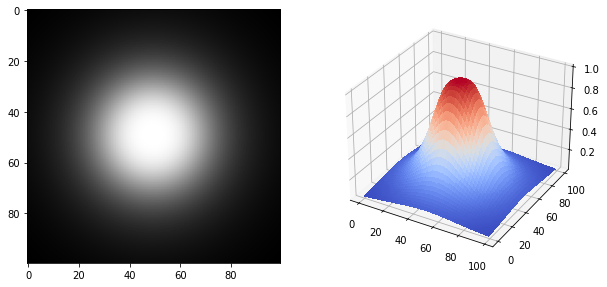

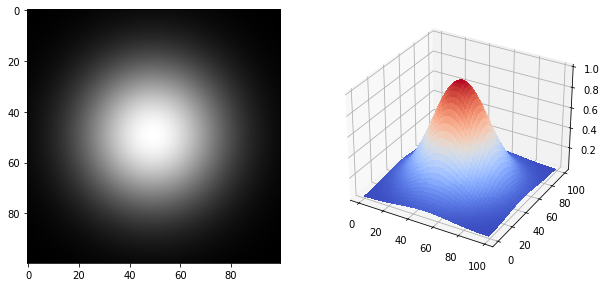

In [7]:
b_mask = butterworthLPF(d0,100,100,n, True)
g_mask = gaussLPF(20,100,100, True)

### 5.3 Display the frequency domain filters in a 2D plot (e.g. imshow, imagesc) and a 3D plot (e.g. mesh,surf, surfc).
- Add log scale


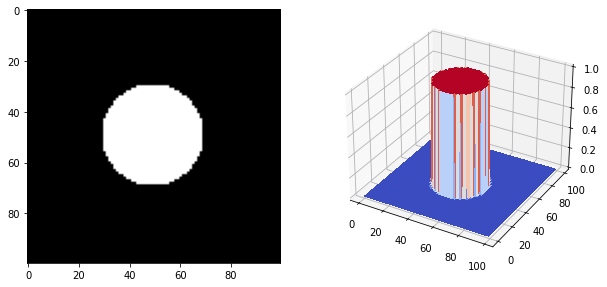

In [8]:
ideal_mask = idealLPF(20,100,100, True)

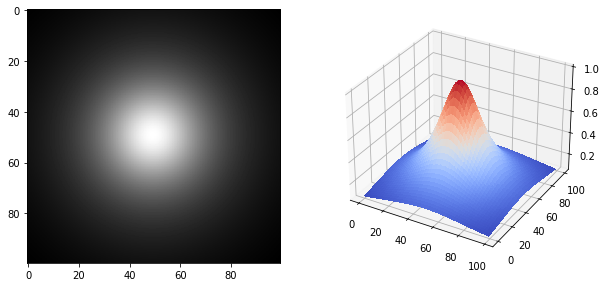

In [9]:
butter_mask = butterworthLPF(20,100,100,1, True)

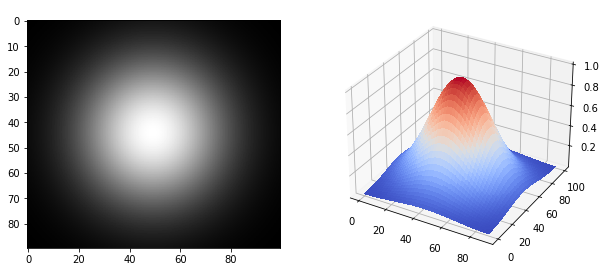

In [10]:
gauss_mask = gaussLPF(20,90,100, True)

### 5.4 Read an image and apply these three filters to it:

In [11]:
def apply_filter(img,filter_mask):
    f = np.fft.fftshift(np.fft.fft2(img))
    f1 = f * filter_mask
    x1 = np.fft.ifft2(np.fft.ifftshift(f1))

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img,cmap="gray")
    ax1.set_title("Original")
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(abs(x1)/255, cmap="gray")
    ax2.set_title("Transformed")
    plt.show()

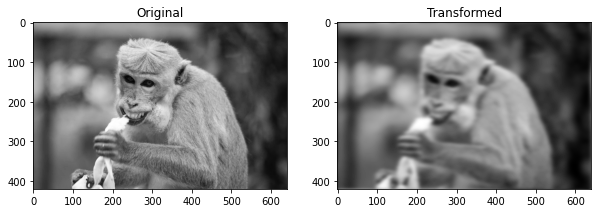

In [12]:
# Read img as grayscale-> 0 flag
img = cv2.imread("images/monkey.jpg",0)


ideal_mask = idealLPF(20,img.shape[0],img.shape[1], False)
butter_mask = butterworthLPF(20,img.shape[0],img.shape[1],1, False)
gauss_mask = gaussLPF(20,img.shape[0],img.shape[1], False)

apply_filter(img, gauss_mask)

### 5.5 Plot a slice of the DFT magnitude (for a M × N image f with DFT F , plot slice |F (M/2, :)|)of the original and filtered images. What do you observe?

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


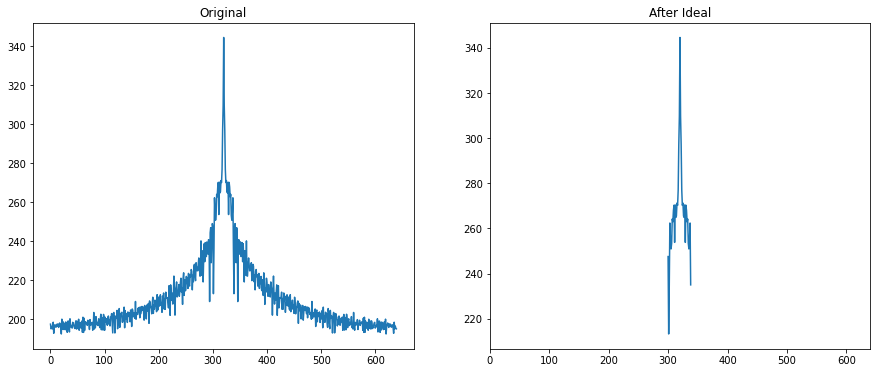

In [64]:
img = cv2.imread("images/monkey.jpg",0)

f = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20*np.log(np.abs(f))

# Select different filters here
ideal_mask = idealLPF(20,img.shape[0],img.shape[1], False)

f_filtered = f * ideal_mask
magnitude_spectrum_filtered = 20*np.log(np.abs(f_filtered))


fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(magnitude_spectrum[int(img.shape[0]/2),:])
ax1.set_title("Original")
ax2.plot(magnitude_spectrum_filtered[int(img.shape[0]/2),:])
ax2.set_title("After Ideal")
plt.xlim([0, img.shape[1]])
plt.show()

### 5.6 Display the resulting images in the spatial domain. What do you observe?

- The images resulting from the filter application are already shown in 5.4. Here I add the 2D images of the magnitude spectrum before and after the filter application

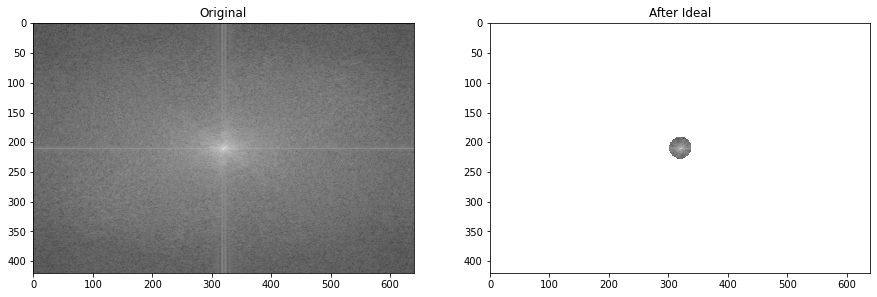

In [65]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.set_title("Original")
ax2.imshow(magnitude_spectrum_filtered, cmap = "gray")
ax2.set_title("After Ideal")
plt.show()

# 6 High pass filtering

### 6.1 Create Python code for (1) Ideal, (2) Butterworth, (3) Gaussian High Pass Filters, with cutoff frequency D0 determined by the user.

In [14]:
def idealHPF(d0, n1, n2, visualize = False):
    # Use math.floor to ensure fit for even & uneven dimensions
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2 + k2**2)
    h = np.zeros((n1,n2))
    h[d > d0] = 1
    if visualize:
        visualize_filter(h)
    return h
    
def butterworthHPF(d0,n1,n2,n, visualize = False):
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2 + k2**2)
    h = 1 / (1 + (d0 / d)**(2*n))
    if visualize:
        visualize_filter(h)
    return h 
    
def gaussHPF(d0,n1,n2, visualize = False):
    h = 1 - gaussLPF(d0,n1,n2)
    if visualize:
        visualize_filter(h)
    return h


### 6.2 Vary the parameters of the BLPF, GLPF so the cut-off frequency effect is the same:

In [15]:
# Initial parameter guess
n_0 = [20,2]

# Pass difference as 1d array
def mask_difference(n):
    b_mask = butterworthHPF(n[0],100,100,n[1])
    g_mask = gaussHPF(20,100,100)
    return (b_mask - g_mask).flatten()

res_1 = least_squares(mask_difference, n_0)

d0 = res_1.x[0]
n = res_1.x[1]

print(f"d0 set to {d0}, n set to {n}")

d0 set to 23.031592859886317, n set to 1.650722492163573


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


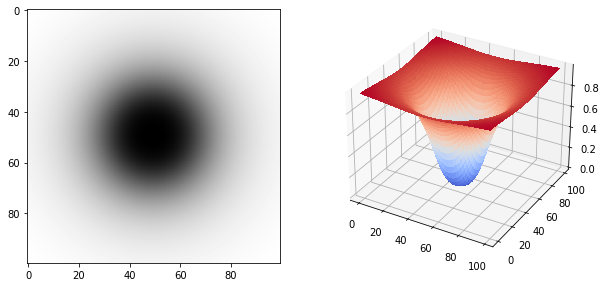

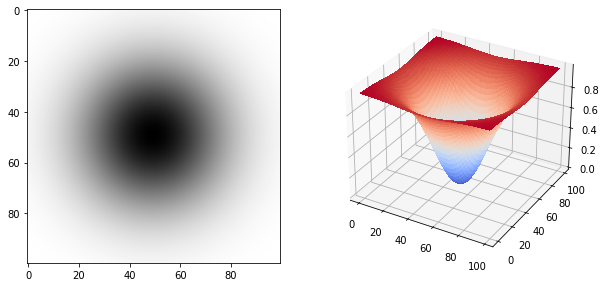

In [16]:
b_mask = butterworthHPF(d0,100,100,n, True)
g_mask = gaussHPF(20,100,100, True)

### 6.3 Display the frequency domain filters in a 2D plot (e.g. imshow, imagesc) and a 3D plot (e.g. mesh,surf, surfc). Don’t forget to use a logarithmic scale (why?)

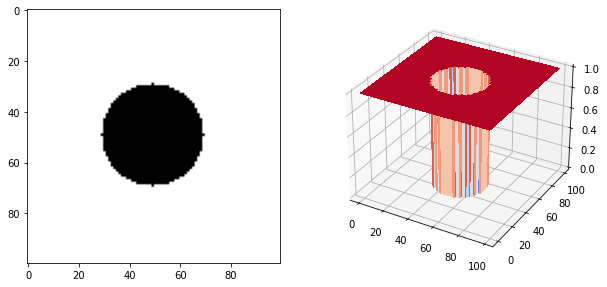

In [17]:
_ = idealHPF(20,100,100,True)

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


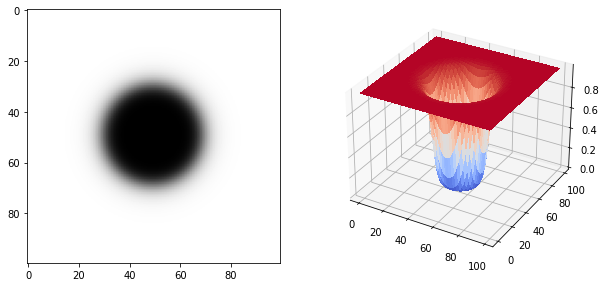

In [18]:
_ = butterworthHPF(20,100,100,5,True)

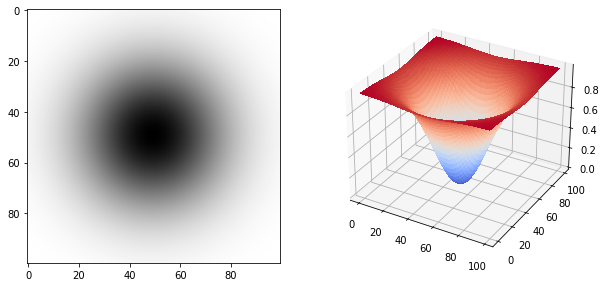

In [19]:
_ = gaussHPF(20,100,100,True)

### 6.4 Read an image and apply these three filters to it.

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


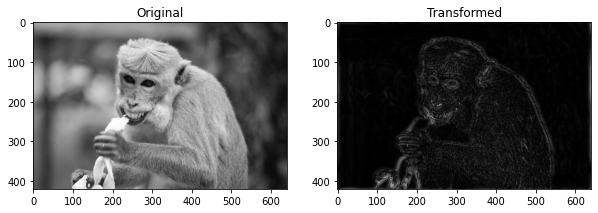

In [20]:
# Read img as grayscale-> 0 flag
img = cv2.imread("images/monkey.jpg",0)


ideal_mask = idealHPF(20,img.shape[0],img.shape[1], False)
butter_mask = butterworthHPF(20,img.shape[0],img.shape[1],1, False)
gauss_mask = gaussHPF(20,img.shape[0],img.shape[1], False)

apply_filter(img, gauss_mask)

### 6.5 Plot a slice of the DFT magnitude (e.g. for a M × N image f with DFT F , plot slice |F (M/2, :)|)of the original and filtered images. What do you observe?

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


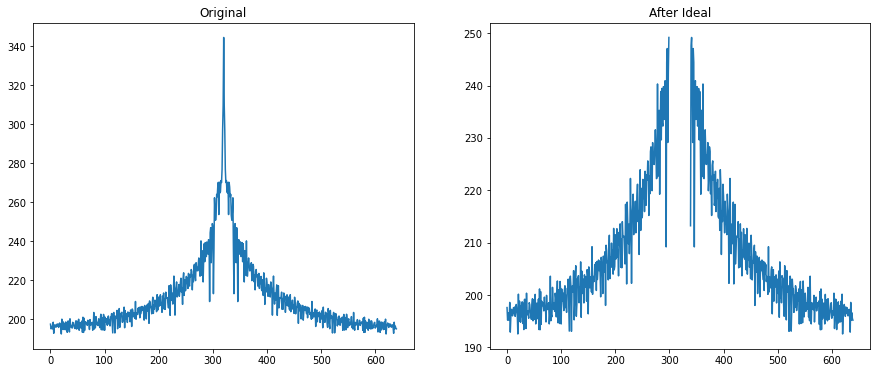

In [70]:
img = cv2.imread("images/monkey.jpg",0)

f = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20*np.log(np.abs(f))

ideal_mask = idealHPF(20,img.shape[0],img.shape[1], False)
f_filtered = f * ideal_mask
magnitude_spectrum_filtered = 20*np.log(np.abs(f_filtered))

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(magnitude_spectrum[int(img.shape[0]/2),:])
ax1.set_title("Original")
ax2.plot(magnitude_spectrum_filtered[int(img.shape[0]/2),:])
ax2.set_title("After Ideal")
plt.show()

### 6.6 Display the resulting images in the spatial domain. What do you observe?

- The images resulting from the filter application are already shown in 6.4. Here I add the 2D images of the magnitude spectrum before and after the filter application

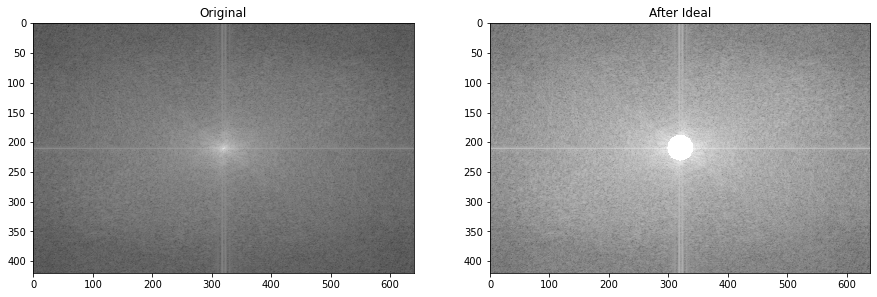

In [71]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.set_title("Original")
ax2.imshow(magnitude_spectrum_filtered, cmap = "gray")
ax2.set_title("After Ideal")
plt.show()

# 7 Pencil Sketch

In [22]:
# Read img as grayscale-> 0 flag
img = cv2.imread("images/monkey.jpg",0)

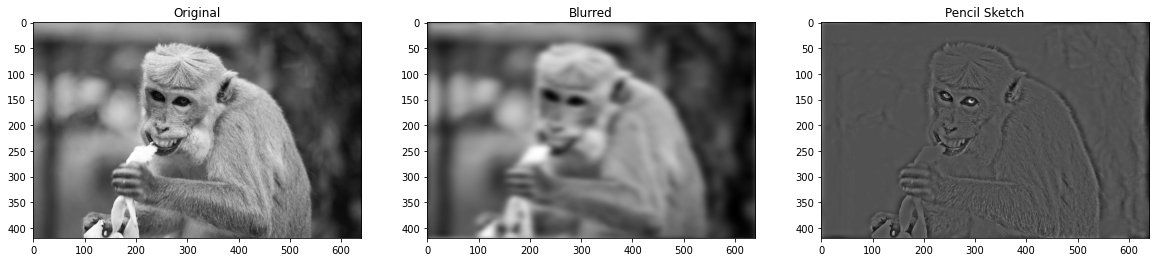

In [23]:
f = np.fft.fftshift(np.fft.fft2(img))

d0 = round(img.shape[0] /20)
h = butterworthLPF(d0,img.shape[0],img.shape[1],2);
f1 = f*h

x1 = abs(np.fft.ifft2(np.fft.ifftshift(f1)))
x1[x1==0] = 1e-2

x2 = img / x1

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img,cmap="gray")
ax1.set_title("Original")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(abs(x1)/255, cmap="gray")
ax2.set_title("Blurred")
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(abs(x2), cmap="gray")
ax2.set_title("Pencil Sketch")
plt.show()

# 8 1D Gaussian Filter

### 8.1 Create Matlab code for two 1D Gaussian filters

In [24]:
def gaussLPFx(d0,n1,n2, visualize = False):
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k1**2)
    h = np.exp(-(d**2)/2/d0/d0)
    if visualize:
        visualize_filter(h)
    return h

def gaussLPFy(d0,n1,n2, visualize = False):
    k1,k2 = np.meshgrid(np.arange(-round(n2/2)+1, math.floor(n2/2)+1), np.arange(-round(n1/2)+1, math.floor(n1/2)+1))
    d = np.sqrt(k2**2)
    h = np.exp(-(d**2)/2/d0/d0)
    if visualize:
        visualize_filter(h)
    return h 

### 8.2 Display the frequency domain filters in a 2D plot and a 3D plot 

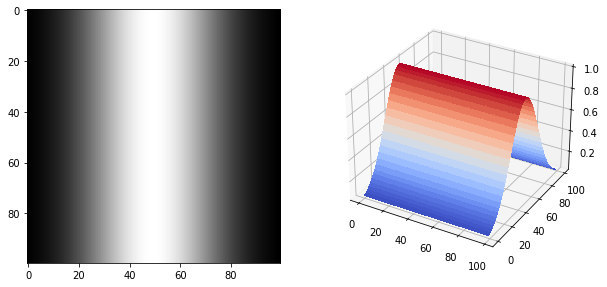

In [25]:
hx = gaussLPFx(20,100,100,True)

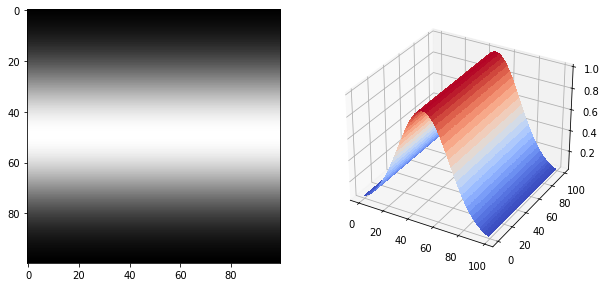

In [26]:
hy = gaussLPFy(20,100,100,True)

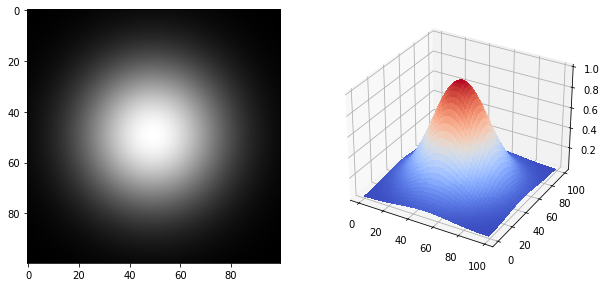

In [27]:
visualize_filter(hx * hy)

### 8.3 Read an image and apply these two filters to it.

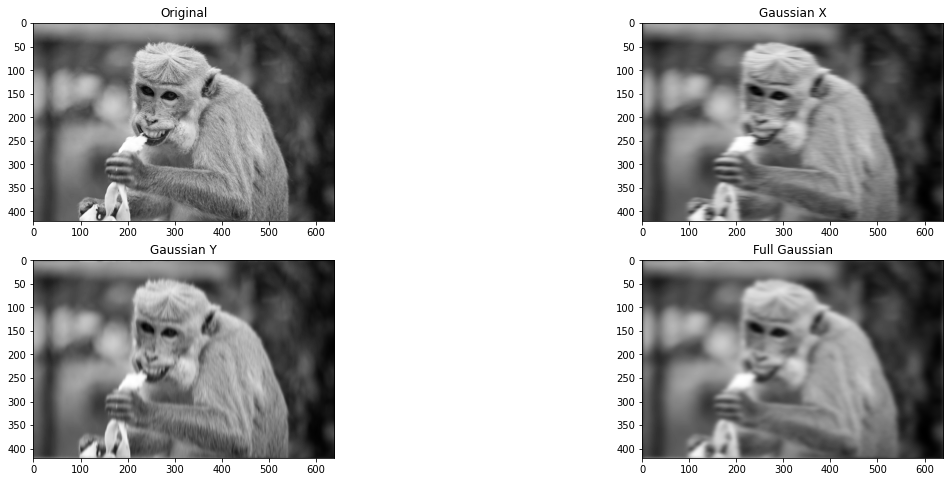

In [28]:
img = cv2.imread("images/monkey.jpg",0)

f = np.fft.fftshift(np.fft.fft2(img))

d0 = round(img.shape[0] /20)
hx = gaussLPFx(d0,img.shape[0],img.shape[1]);
hy = gaussLPFy(d0,img.shape[0],img.shape[1]);

f1 = f*hx
f2 = f*hy
f3 = f1*hy

x1 = abs(np.fft.ifft2(np.fft.ifftshift(f1)))
x2 = abs(np.fft.ifft2(np.fft.ifftshift(f2)))
x3 = abs(np.fft.ifft2(np.fft.ifftshift(f3)))

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img,cmap="gray")
ax1.set_title("Original")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(abs(x1)/255, cmap="gray")
ax2.set_title("Gaussian X")
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(abs(x2), cmap="gray")
ax3.set_title("Gaussian Y")
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(abs(x3), cmap="gray")
ax4.set_title("Full Gaussian")
plt.show()

### 8.4 Plot a slice of the DFT magnitude (e.g. for a M timesN image f with DFT F , plot slice |F (M/2, :)|)of the original and filtered images. What do you observe?

- Note that ax3 looks unchanged as we are plotting a X slice while applying a 1D y Gaussian filter

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


(0.0, 640.0)

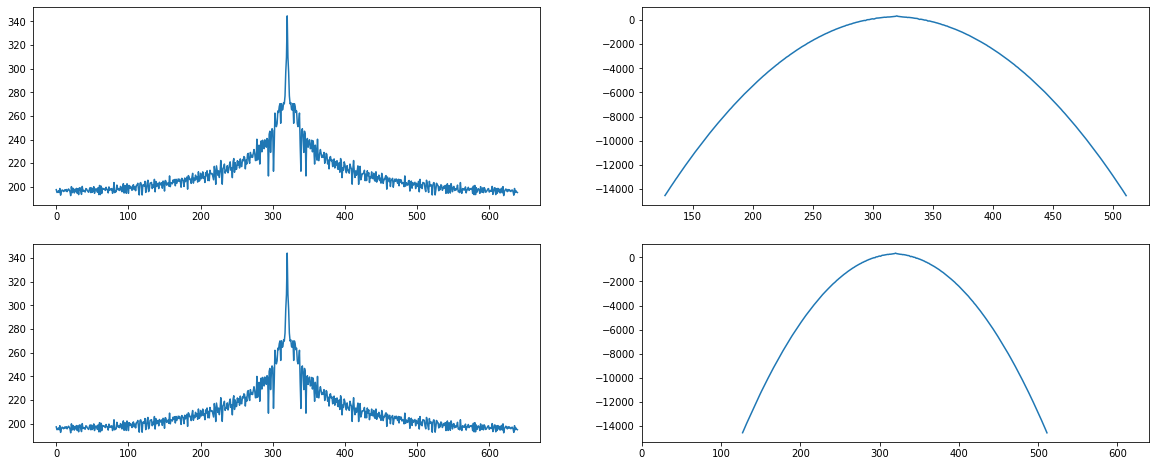

In [63]:
img = cv2.imread("images/monkey.jpg",0)

f = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20*np.log(np.abs(f))

gx = gaussLPFx(5,img.shape[0],img.shape[1], False)
f_filteredx = f * gx

gy = gaussLPFy(5,img.shape[0],img.shape[1], False)
f_filteredy = f * gy

g = gaussLPF(5,img.shape[0],img.shape[1],False)

f_filteredfull = f *g 

magnitude_spectrumx = 20*np.log(np.abs(f_filteredx))
magnitude_spectrumy = 20*np.log(np.abs(f_filteredy))
magnitude_spectrumfull = 20*np.log(np.abs(f_filteredfull))

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(magnitude_spectrum[int(img.shape[0]/2),:])
ax2.plot(magnitude_spectrumx[int(img.shape[0]/2),:])
ax3.plot(magnitude_spectrumy[int(img.shape[0]/2),:])
ax4.plot(magnitude_spectrumfull[int(img.shape[0]/2),:])
plt.xlim([0, img.shape[1]])

### 8.5 Display the resulting images in the spatial domain. What do you observe?

- The images resulting from the filter application are already shown in 8.3. Here I add the 2D images of the magnitude spectrum before and after the filter application

c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Full Gauss')

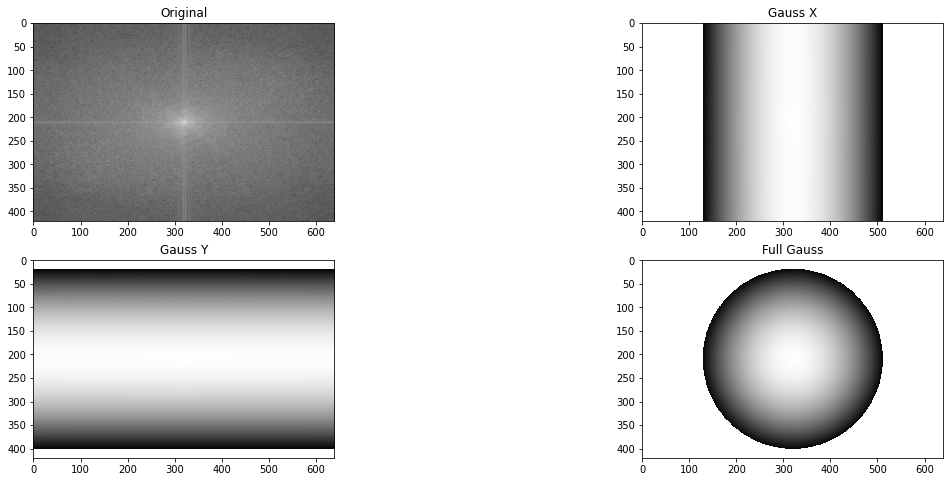

In [46]:
img = cv2.imread("images/monkey.jpg",0)

f = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20*np.log(np.abs(f))

gx = gaussLPFx(5,img.shape[0],img.shape[1], False)
f_filteredx = f * gx

gy = gaussLPFy(5,img.shape[0],img.shape[1], False)
f_filteredy = f * gy

g = gaussLPF(5,img.shape[0],img.shape[1],False)
f_filteredfull = f * g

magnitude_spectrumx = 20*np.log(np.abs(f_filteredx))
magnitude_spectrumy = 20*np.log(np.abs(f_filteredy))
magnitude_spectrumfull = 20*np.log(np.abs(f_filteredfull))

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.set_title("Original")
ax2.imshow(magnitude_spectrumx, cmap = 'gray')
ax2.set_title("Gauss X")
ax3.imshow(magnitude_spectrumy, cmap = 'gray')
ax3.set_title("Gauss Y")
ax4.imshow(magnitude_spectrumfull, cmap = 'gray')
ax4.set_title("Full Gauss")